<center><h1 style = "font-size:50px;font-family: Comic Sans MS" >🦜 BirdCLEF</h1></center>


📌[Audio Albumentations Notebook](https://www.kaggle.com/shreyasajal/audio-albumentations-torchaudio-audiomentations)


<center><h1 style = "font-size:20px;font-family: Comic Sans MS">LET'S UNDERSTAND AUDIO FEATURES</h1></center>


<h1 style = "font-size:45px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Audio Feature Extraction</h1>

<h3 style="font-family:Comic Sans MS">Feature extraction is the process of highlighting the most discriminating and impactful features of a signal.This notebook will walk you through some important feature extractions in audio processing and you can extend it to many other types of features which will be suitable for your problem domain.The rest of the notebook is just an attempt of a biotechnology student to explain you whatever signal processing she was able to understand in the last few days.So,bear with me😛

<h4 style="font-family:Comic Sans MS">The Three Main Types of Audio Features Extraction we will discuss:<br><br>
    1.<a href=#sec1>Time Domain</a><br>
    2.<a href=#sec2>Frequency Domain</a><br>
    3.<a href=#sec3>Spectrum-Based</a>


# Import The Libraries📚

In [ ]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# SEE THE DATA 🐔:

In [ ]:
train_csv=pd.read_csv('../input/birdclef-2021/train_metadata.csv')
train_csv.head()

SAMPLE A FEW AUDIOS FROM THE TRAIN SET

In [ ]:
base_dir = '../input/birdclef-2021/train_short_audio'
train_csv['full_path'] = base_dir+ '/' + train_csv['primary_label'] + '/' + train_csv['filename']
astfly = train_csv[train_csv['primary_label'] == "astfly"].sample(1, random_state = 33)['full_path'].values[0]
casvir = train_csv[train_csv['primary_label'] == 'casvir'].sample(1, random_state = 33)['full_path'].values[0]
subfly = train_csv[train_csv['primary_label'] == "subfly"].sample(1, random_state = 33)['full_path'].values[0]
wilfly = train_csv[train_csv['primary_label'] == 'wilfly'].sample(1, random_state = 33)['full_path'].values[0]
verdin = train_csv[train_csv['primary_label'] == 'verdin'].sample(1, random_state = 33)['full_path'].values[0]
solsan = train_csv[train_csv['primary_label'] == 'solsan'].sample(1, random_state = 33)['full_path'].values[0]
birds= ["astfly", "casvir", "subfly", "wilfly", "verdin",'solsan']


<h1 style = "font-size:20px;font-family: Comic Sans MS">PLAY A FEW OF OUR SAMPLES:</h1>

In [ ]:
ipd.Audio(astfly)

In [ ]:
ipd.Audio(casvir)

In [ ]:
ipd.Audio(subfly)

In [ ]:
ipd.Audio(solsan)

# Loading and Visualizing an audio file:
* librosa.load: loads an audio file as a floating point time series and gives it's native sampling rate.
* The sampling frequency (or sample rate) is the number of samples (data points) per second in an audio.
* We can check the audio length by dividing the total number of data points by the sampling frequency.


In [ ]:
y, sr = librosa.load(subfly)
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)


<h1 style = "font-size:20px;font-family: Comic Sans MS">TRIMMING THE LEADING AND TRAILING SILENCE:🎵</h1>

In [ ]:
audio_file, _ = librosa.effects.trim(y)
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))


<h1 style = "font-size:20px;font-family: Comic Sans MS">APPLY TO ALL OUR SAMPLES:</h1>

In [ ]:
y_astfly, sr_astfly = librosa.load(astfly)
audio_astfly, _ = librosa.effects.trim(y_astfly)

y_casvir, sr_casvir = librosa.load(casvir)
audio_casvir, _ = librosa.effects.trim(y_casvir)

y_subfly, sr_subfly = librosa.load(subfly)
audio_subfly, _ = librosa.effects.trim(y_subfly)

y_wilfly, sr_wilfly = librosa.load(wilfly)
audio_wilfly, _ = librosa.effects.trim(y_wilfly)

y_verdin, sr_verdin = librosa.load(verdin)
audio_verdin, _ = librosa.effects.trim(y_verdin)

y_solsan, sr_solsan = librosa.load(solsan)
audio_solsan, _ = librosa.effects.trim(y_solsan)

<a id='sec1'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">1.Time Domain Features</h1>

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Waveform Visualization</h1>

<h4 style="Comic Sans MS">To visualize the sampled signal and plot it, we need two Python libraries—Matplotlib and Librosa. The following code depicts the waveform visualization of the amplitude vs the time representation of the 6 signals.</h4>

In [ ]:
fig, ax = plt.subplots(6, figsize = (16, 12))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = audio_astfly, sr = sr_astfly, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_casvir, sr = sr_casvir, color = "#4300FF", ax=ax[1])
librosa.display.waveplot(y = audio_subfly, sr = sr_subfly, color = "#009DFF", ax=ax[2])
librosa.display.waveplot(y = audio_wilfly, sr = sr_wilfly, color = "#00FFB0", ax=ax[3])
librosa.display.waveplot(y = audio_verdin, sr = sr_verdin, color = "#D9FF00", ax=ax[4])
librosa.display.waveplot(y = audio_solsan, sr = sr_solsan, color = "r", ax=ax[5]);

for i, name in zip(range(6), birds):
    ax[i].set_ylabel(name, fontsize=13)

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTROGRAM</h1>

<h4 style="Comic Sans MS"> A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. They are time-frequency portraits of signals. Using a spectrogram, we can see how energy levels (dB) vary over time.It is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.<br><br>
-stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.<br>
- .specshow is used to display a spectrogram.<br><br>
    
The Short-time Fourier transform (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time. In practice, the procedure for computing STFTs is to divide a longer time signal into shorter segments of equal length and then compute the Fourier transform separately on each shorter segment. This reveals the Fourier spectrum on each shorter segment. One then usually plots the changing spectra as a function of time, known as a spectrogram<br><br>
Log-frequency axis: Features can be obtained from a spectrogram by converting the linear frequency axis into a logarithmic axis. The resulting representation is also called a log-frequency spectrogram</h4>

In [ ]:
n_fft=2048
hop_length=512
# Short-time Fourier transform (STFT)
D_astfly = np.abs(librosa.stft(audio_astfly, n_fft = n_fft, hop_length = hop_length))
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_astfly = librosa.amplitude_to_db(D_astfly, ref = np.max)
# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Log Frequency Spectrogram', fontsize=16)
# fig.delaxes(ax[1, 2])
img=librosa.display.specshow(DB_astfly, sr = sr_astfly, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax)
ax.set_title('ASTFLY', fontsize=13) 
plt.colorbar(img,ax=ax)

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">RMSE</h1>

<h4 style="Comic Sans MS">The energy of a signal corresponds to its total magnitude. For audio signals this roughly characterizes how loud the signal is.RMSE,a method of characterizing signal energy, calculates the square root of the mean square (the average of the squares of magnitude of the audio frames).
<br><br>
Using a spectrogram can give us a more accurate representation of energy because its frames can be windowed. Therefore, if a spectrogram is already available, we prefer to run the RMS function over it</h4>

In [ ]:
S, phase = librosa.magphase(librosa.stft(audio_astfly))
S_db=librosa.amplitude_to_db(S, ref=np.max)
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True,figsize = (16, 6))
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(S_db,
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">MEL SPECTROGRAM</h1>

<h4 style="Comic Sans MS">A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. 
<br><br>
MEL SCALE:The mel scale (after the word melody) is a perceptual scale of pitches judged by listeners to be equal in distance from one another.In 1937,a unit of pitch was proposed such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale. We perform a mathematical operation on frequencies to convert them to the mel scale.</h4>

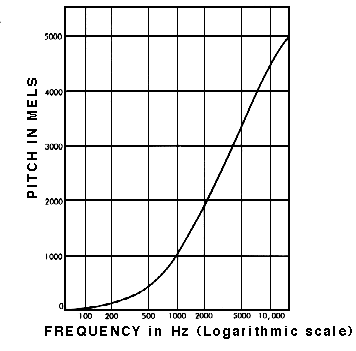

In [ ]:
# Create the Mel Spectrograms
S_astfly = librosa.feature.melspectrogram(audio_astfly, sr=sr_astfly)
S_DB_astfly = librosa.amplitude_to_db(S_astfly, ref=np.max)
# === PLOT ====
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mel Spectrogram', fontsize=16)
img=librosa.display.specshow(S_DB_astfly, sr = sr_astfly, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax)

ax.set_title('ASTFLY', fontsize=13)
plt.colorbar(img,ax=ax)

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">ZERO CROSSING RATE(ZCR)</h1>

<h4 style="Comic Sans MS">The ZCR of an audio signal is defined as the rate at which the signal changes sign. ZCR is an efficient and simple way to detecting whether a speech frame is voice, unvoiced, or silent. It is expected that unvoiced segments produce higher ZCRs than for voice segments, and ideally ZCRs equal to zero for silence segments  
</h4>

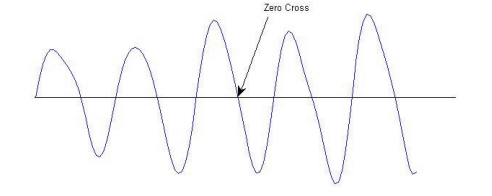

In [ ]:
# Total zero_crossings in our 1 song
zero_astfly = librosa.zero_crossings(audio_astfly, pad=False)
zero_casvir = librosa.zero_crossings(audio_casvir, pad=False)
zero_wilfly = librosa.zero_crossings(audio_wilfly, pad=False)
zero_subfly = librosa.zero_crossings(audio_subfly, pad=False)
zero_verdin = librosa.zero_crossings(audio_verdin, pad=False)
zero_solsan = librosa.zero_crossings(audio_solsan, pad=False)
zero_birds_list = [zero_astfly, zero_casvir, zero_wilfly, zero_subfly, zero_verdin,zero_solsan]

for bird, name in zip(zero_birds_list, birds):
    print("{} change rate is {:,}".format(name, sum(bird)))

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Separation of Harmonic & Percussive Signals</h1>

<h4 style="Comic Sans MS">Sounds can broadly be classified into two classes. <br>-Harmonic sound on the one hand side is what we perceive as pitched sound and what makes us hear melodies and chords. <br>-Percussive sound on the other hand is noise-like and usually stems from instrument onsets like the hit on a drum or from consonants in speech.<br>
hpss is harmonic-percussive source separation algorithm

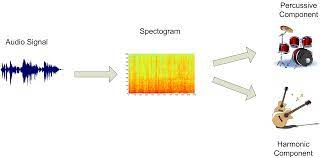

In [ ]:
y_harm_casvir, y_perc_casvir = librosa.effects.hpss(audio_casvir)
D_casvir = np.abs(librosa.stft(audio_casvir, n_fft = n_fft, hop_length = hop_length))
DB_casvir = librosa.amplitude_to_db(D_casvir, ref = np.max)
plt.figure(figsize = (16, 6))
plt.plot(y_perc_casvir, color = '#FFB100')
plt.plot(y_harm_casvir, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics + Percussive : Casvir Bird", fontsize=16);


H, P = librosa.decompose.hpss(librosa.stft(audio_casvir))    
plt.figure(figsize=(16, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(DB_casvir, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram: Harmonic + Percussive')

# harmonic spectrogram will show more horizontal/pitch-dependent changes
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')
plt.subplot(3, 1, 3)

# percussive spectrogram will show more vertical/time-dependent changes
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')
plt.tight_layout()
plt.show()

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800000;color:#FFFFFF">BEAT EXTRACTION</h1>


In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harm_casvir, sr=sr_casvir)
print('Detected Tempo: '+ str(tempo) + ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff = np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g = sns.barplot(beat_nums, beat_time_diff, palette="rocket",ax=ax)
g = g.set(xticklabels=[])

In [ ]:
# Create Tempo BPM variable
tempo_astfly, _ = librosa.beat.beat_track(y_astfly, sr = sr_astfly)
tempo_casvir, _ = librosa.beat.beat_track(y_casvir, sr = sr_casvir)
tempo_wilfly, _ = librosa.beat.beat_track(y_wilfly, sr = sr_wilfly)
tempo_subfly, _ = librosa.beat.beat_track(y_subfly, sr = sr_subfly)
tempo_verdin, _ = librosa.beat.beat_track(y_verdin, sr = sr_verdin)
tempo_solsan, _ = librosa.beat.beat_track(y_solsan, sr = sr_solsan)
data = pd.DataFrame({"Type": birds , 
                     "BPM": [tempo_astfly, tempo_casvir, tempo_wilfly, tempo_subfly, tempo_verdin,tempo_solsan] })


# Plot
plt.figure(figsize = (16, 6))
ax = sns.barplot(y = data["BPM"], x = data["Type"], palette="rocket")
plt.ylabel("BPM", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("")
plt.title("BPM for 6 Different Bird Species", fontsize=16);

<a id='sec2'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">Frequency Domain Features</h1>

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800000;color:#FFFFFF">CHROMAGRAM</h1>

<h4 style="Comic Sans MS">Chroma features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing).<br>A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces. <br>The 12 bins are clearly visisble in the plots below.It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagra</h4>

In [ ]:
chroma=librosa.feature.chroma_stft(y=audio_casvir, sr=sr_casvir)
fig, ax = plt.subplots(1,figsize = (10, 5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [ ]:
#using an energy(magnitude) spectrum
S = np.abs(librosa.stft(audio_casvir))
chroma = librosa.feature.chroma_stft(S=S, sr=sr_casvir)#applying the logarithmic fourier transform
fig, ax = plt.subplots(1,figsize = (10, 5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')


<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800000;color:#FFFFFF">Constant Q-transform (CQT)</h1>
<h4 style="Comic Sans MS">The constant-Q transform transforms a data series to the frequency domain. It is related to the Fourier transform.<br>In general, the transform is well suited to musical data and proves useful where frequencies span several octaves.It is more useful in the identification of instruments.<br>To compute a constant-Q spectrogram, will use the libROSA cqt function:</h4>

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=audio_casvir, sr=sr_casvir)
chroma_cq = librosa.feature.chroma_cqt(y=audio_casvir, sr=sr_casvir)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (10, 9))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
# ax[1].label_outer()
# img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[2])
# ax[2].set(title='chroma_cens')
fig.colorbar(img, ax=ax)



<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800000;color:#FFFFFF">Chroma Energy distribution Normalized Statistics (CENS)</h1>
<h4 style="Comic Sans MS">Another chroma-based feature is chroma energy distribution normalized statistics (CENS) which is typically used to identify similarity between different interpretations of the music given.CENS are typically implemented for audio matching and similarity tasks.</h4>

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=audio_casvir, sr=sr_casvir)
chroma_cens = librosa.feature.chroma_cens(y=audio_casvir, sr=sr_casvir)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (10, 9))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()

img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

<a id='sec3'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">Spectrum Related Features</h1>

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL CENTROIDS</h1>

<h4 style="Comic Sans MS">The spectral centroid is a measure to characterize the "center of mass" of a given spectrum.The spectral centroid is calculated as the weighted means of the frequencies present in a given signal, determined using a Fourier transform, with the frequency magnitudes as the weights.Here S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.


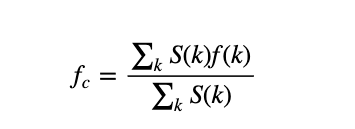


In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_casvir, sr=sr_casvir)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_casvir, sr=sr_casvir, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: Casvir Bird", fontsize=16);


<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL CONTRAST</h1>

<h4 style="Comic Sans MS">The difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.<br>Spectral peaks correspond to harmonic components and Spectral valleys correspond to non-harmonic components or noise in a music piece.It considers the spectral peak and valley in each sub-band separately.


In [ ]:
contrast = librosa.feature.spectral_contrast(y=y_harm_casvir,sr=sr_casvir)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')


<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL ROLLOFF</h1>

<h4 style="Comic Sans MS">Spectral rolloff point is defined as the Nth percentile frequency of the power spectral distribution, where  is usually 85% or 95%. The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated. In other words,the rolloff frequency is defined as the frequency under which the cutoff of the total energy of the spectrum is contained, eg. 85%. It can be used to distinguish between harmonic and noisy sounds.

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_astfly, sr=sr_astfly)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_astfly, sr=sr_astfly, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Astfly Bird", fontsize=16);




<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Mel-frequency cepstral coefficients (MFCCs)</h1>

<h4 style="Comic Sans MS">One popular audio feature extraction method is the Mel-frequency cepstral coefficients (MFCC), which has 39 features. The feature count is small enough to force the model to learn the information of the audio. 12 parameters are related to the amplitude of frequencies. It models the characteristics of the human voice. The extraction flow of MFCC features is depicted below:

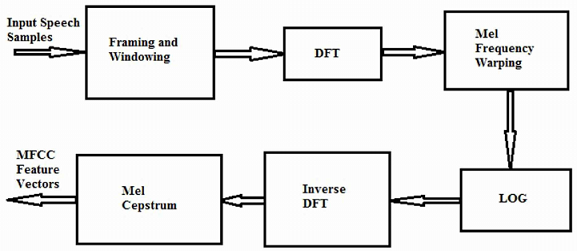

<h4 style="Comic Sans MS">This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.<br><br>By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.


In [ ]:
mfcc=librosa.feature.mfcc(y=audio_astfly, sr=sr_astfly)
fig, ax = plt.subplots(1,figsize = (12, 6))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
print(mfcc.shape)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

**References:**
* https://www.kaggle.com/andradaolteanu/birdcall-recognition-eda-and-audio-fe
* https://rramnauth2220.github.io/blog/posts/code/200525-feature-extraction.html

![Upvote!](https://img.shields.io/badge/Upvote-If%20you%20like%20my%20work-07b3c8?style=for-the-badge&logo=kaggle)